LINEAR REGRESSION

Importing the dataset

In [1]:
from sklearn.datasets import fetch_california_housing
X,y=fetch_california_housing(as_frame=True,return_X_y=True)
# return_X_y=True is to return features and targets separately
# as_frame=True returns the dataset as Pandas dataframe 

Shape of feature matrix

In [2]:
X.shape

(20640, 8)

In [3]:
X.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [4]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

1. MedInc: This feature represents the median income of households in a specific district.
2. HouseAge: It represents the median age of houses in the same district.
3. AveRooms: This feature denotes the average number of rooms per dwelling in that district.
4. AveBedrms: It represents the average number of bedrooms per dwelling.
5. Population: It denotes the total population in the district.
6. AveOccup: This feature represents the average occupancy per dwelling.
7. Latitude: It denotes the latitude of the district's location.
8. Longitude: This feature represents the longitude of the district's location.

Check for missing values

In [5]:
X.isna().sum() # shown sum of NA values in each column
X.isna().sum().sum() #shows total no of missing values in the feature matrix

0

Checking correlation

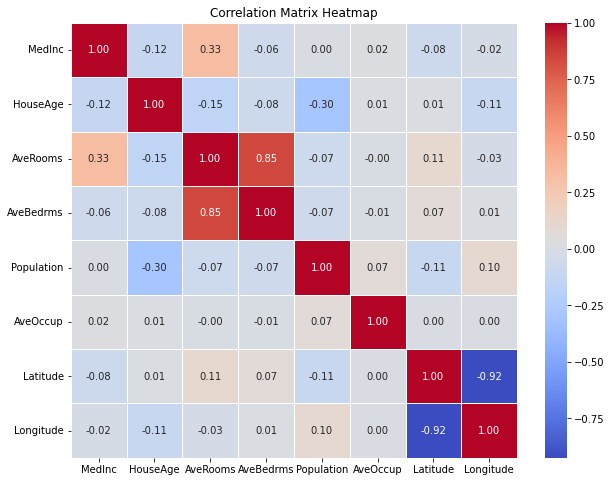

In [8]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# strong positive correlation between average rooms and average bedrooms (obviously)
# strong negative correlation between lattitude and longitude (umm...)
# some positive correlation between median income and rooms (makes sense)

Checking for outliers

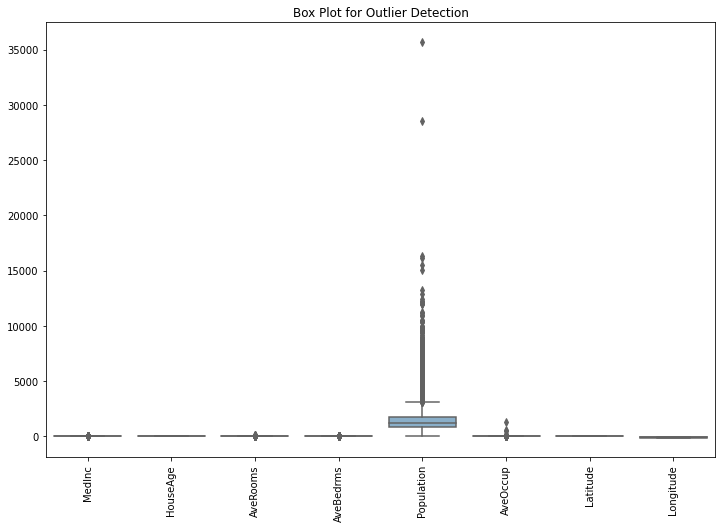

In [9]:
plt.figure(figsize=(12, 8))
plt.title("Box Plot for Outlier Detection")
sns.boxplot(data=X, orient='v', palette='Set3')
plt.xticks(rotation=90)
plt.show()

# outliers in population, 
# Population also has significantly different scale, will have to scale the dataset

Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False,random_state=42)
# random_state is set to produce reproducible output across multiple function calls
# shuffle False means do not shuffle data before splitting

Accessing specific rows and columns in train and test datasets

In [12]:
X_test.HouseAge.iloc[2]

28.0

In [13]:
X_test.Population.iloc[0]

1310.0

In [14]:
y_train.mean()

2.02067031310562

In [15]:
y_test.median()

2.1475

Creating the Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline(steps=[('scaler',StandardScaler()),('regressor',LinearRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Standard Scalar: The StandardScaler works by subtracting the mean of each feature and then scaling it to have unit variance. The resulting feature will have a mean of 0 and a standard deviation of 1. This process ensures that the features are centered around zero and have a similar scale.

standardized feature value = (feature value - mean of feature)/standard deviation

* fit method computes the mean and standard deviation of each feature from the training data
* transform method applies the standardization formula to scale the features based on the computed mean and standard deviation

Coefficients obtained:-

In [17]:
pipe[-1].coef_

array([ 0.83817967,  0.12032096, -0.32135834,  0.36456599, -0.00170674,
       -0.04524631, -0.87994217, -0.82634126])

Coefficient of a feature quantifies the impact of that feature on the target variable while holding other features constant

In [18]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Bias term:-

In [19]:
pipe[-1].intercept_

2.020670313105614

y = (w^T)x + b

The bias term, often denoted as "b" or "intercept," represents the value of the target variable when all input features are zero. It accounts for the constant offset or baseline prediction of the model. The bias term allows the linear regression line to be shifted up or down, influencing the overall position of the line.

Checking the accuracy of the model

1. R-squared value:-

In [20]:
import sklearn.metrics as skm
y_pred = pipe.predict(X_test)
skm.r2_score(y_test,y_pred)

0.660514059153199

* R^2 score - coefficient of determination
* R2 score can also be negative if the model performs worse than a simple horizontal line
* R2 = 1 - (∑(ypred,i - ytest,i)^2)/(∑(ytest,i - ymean)^2)
*           (predicted - actual)/(actual - mean)
* R2 score is sensitive to the number of features in the model and can be artificially inflated when more features are added, even if they are unrelated to the target variable.

2. Root mean squared error (MSE)

In [24]:
skm.mean_squared_error(y_test,y_pred)

0.4946848356388077

* RMSE = sqrt(mean((y_pred - y_actual)^2))
* It represents the standard deviation of the residuals
* Lower values of RMSE indicate better model performance, as they indicate smaller average prediction errors.
* RMSE is sensitive to outliers, as large errors will have a greater impact due to squaring

3. Explained Variance Score

In [22]:
skm.explained_variance_score(y_test,y_pred)

0.6605500501742702

* Explained Variance Score = 1 - (Var(y_actual - y_pred) / Var(y_actual))
* The explained variance score ranges between 0 (fails to fit) and 1 (perfect fit)
* The explained variance score is particularly useful in situations where the absolute values of the target variable are less meaningful, but the variability or trends are important.

4. Mean Absolute Error (MAE)

In [23]:
skm.mean_absolute_error(y_test,y_pred)

0.5168526993787042

* average absolute difference between the predicted values and the actual values of the target variable
* MAE = mean(|y_pred - y_actual|)
* MAE does not square the errors, which makes it less sensitive to outliers
* A lower MAE value indicates better model performance, as it signifies smaller average prediction errors
* Limitation: MAE does not differentiate between overestimating and underestimating the target variable

STOCHASTIC GRADIENT DESCENT

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

def baseline_sgd( X, y, X_test, y_test, scaler):
  model = Pipeline([('scale',scaler),('sgd',SGDRegressor(random_state=0))])
  model.fit(X, y)

  return_vals= {"Coeffecients": model[-1].coef_,"Bias": model[-1].intercept_,
              }  

  return return_vals
X_train,Xtest,y_train,ytest= train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
baseline_sgd(X_train,y_train,X_test,y_test,StandardScaler())

{'Coeffecients': array([ 0.84046697,  0.112331  , -0.41213039,  0.21595971, -0.01781887,
        -0.01480892, -0.87394103, -0.83913104]),
 'Bias': array([2.01123921])}